In [2]:
import pandas as pd
db=pd.read_csv("World_Alcohol_Dataset - MAIN.csv")
print(db.head())

               country beer_servings spirit_servings wine_servings  \
0          Afghanistan             0               0             0   
1              Albania            89             132            54   
2              Algeria            25               0            14   
3               Angola           217              57            45   
4  Antigua and Barbuda           102             128            45   

   life_expentancy                region  gdp_per_capita  
0             65.0  ASIA (EX. NEAR EAST)             700  
1             77.8        EASTERN EUROPE            4500  
2             75.6       NORTHERN AFRICA            6000  
3             52.4    SUB-SAHARAN AFRICA            1900  
4             76.4   LATIN AMER. & CARIB           11000  


In [5]:
db1=db[(db["region"].str.contains("EUROPE"))|(db["region"].str.contains("AFRICA"))][["country","region","gdp_per_capita"]]
db1.insert(1,"fi",[x[-1:-7:-1][::-1] for x in db1["region"]])
db1=db1[["gdp_per_capita","fi"]].groupby("fi").mean().reset_index()
print(db1)
print(db.dtypes)

       fi  gdp_per_capita
0  AFRICA     2556.730769
1  EUROPE    21422.580645
country             object
beer_servings       object
spirit_servings     object
wine_servings       object
life_expentancy    float64
region              object
gdp_per_capita       int64
dtype: object


In [ ]:
db=db[db["beer_servings"]!="?"]
db=db[db["spirit_servings"]!="?"]
db=db[db["wine_servings"]!="?"]
db["beer_servings"]=db["beer_servings"].astype(float)
db["spirit_servings"]=db["spirit_servings"].astype(float)
db["wine_servings"]=db["wine_servings"].astype(float)
db["gdp_per_capita"]=db["gdp_per_capita"].astype(float)
db["consmedio"]=(db["beer_servings"]+db["spirit_servings"]+db["wine_servings"])/3
print(db.dtypes)

country             object
beer_servings      float64
spirit_servings    float64
wine_servings      float64
life_expentancy    float64
region              object
gdp_per_capita     float64
consmedio          float64
dtype: object


In [ ]:
media=db["consmedio"].mean()
db1=db[["country","life_expentancy","consmedio","gdp_per_capita"]][db["consmedio"]>media]
print(db1["gdp_per_capita"].mean())
print(media)

13962.337662337663
77.10727969348659


In [ ]:
db2=db[["country","life_expentancy","consmedio","gdp_per_capita"]][db["consmedio"]<=media]
print(db2["gdp_per_capita"].mean())

4122.680412371134


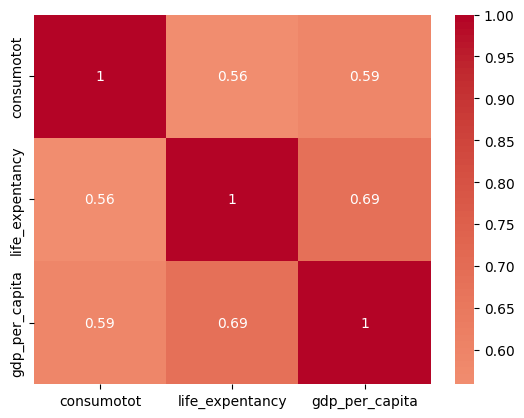

In [ ]:
db["consumotot"]=db["beer_servings"]+db["spirit_servings"]+db["wine_servings"]
cor=db[["consumotot","life_expentancy","gdp_per_capita"]].corr()
import seaborn as sns
import matplotlib.pylab as plt
sns.heatmap(cor,annot=True,center=0,cmap="coolwarm")
plt.show()

                      life_expentancy   consmedio  gdp_per_capita
region                                                           
ASIA (EX. NEAR EAST)        72.796000   33.066667     6156.000000
BALTICS                     75.266667  186.555556    11300.000000
C.W. OF IND. STATES         71.758333   94.916667     4000.000000
EASTERN EUROPE              77.736364  179.454545    10090.909091
LATIN AMER. & CARIB         74.714286  106.452381     6242.857143
NEAR EAST                   74.957143   29.761905    11839.285714
NORTHERN AFRICA             75.380000   10.133333     5460.000000
NORTHERN AMERICA            80.750000  158.833333    33800.000000
OCEANIA                     72.466667   58.592593     7977.777778
SUB-SAHARAN AFRICA          61.325532   32.624113     2247.872340
WESTERN EUROPE              81.844444  171.722222    28627.777778
life_expentancy       74.454130
consmedio             96.555756
gdp_per_capita     11612.952713
dtype: float64


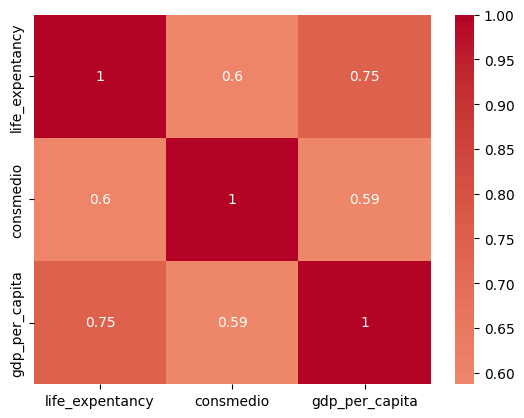

In [ ]:
db1=db[["life_expentancy","consmedio","gdp_per_capita","region"]].groupby("region").mean()
media=db1.mean()
sns.heatmap(db1.corr(),annot=True,center=0,cmap="coolwarm")
print(db1)
print(media)